# Content Based Recommendation

Content-based recommendation engine works with existing profiles of users. A profile has information about a user and their taste. Taste is based on user rating for different items. Generally, whenever a user creates his profile, Recommendation engine does a user survey to get initial information about the user in order to avoid new user problem.

In [81]:
from IPython.display import Image
img = Image(url= "https://qph.fs.quoracdn.net/main-qimg-47d13b2c4c0057851a276a033a7293b5.webp")
img

* * *

## Library & Read CSV

What library i used and read CSV

In [77]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics.pairwise import cosine_similarity
from IPython.core.display import HTML 

In [63]:
df = pd.read_csv('D:/MATERI/09172019-MBA/content-based-rec-engine/data/movie.csv',sep = ';')

In [64]:
df.head()

,film,Rating,Genre,Actor,Actress,Director
0,a,10,action,budi,dini,ahmad
1,b,8,horror,komeng,dini,dani
2,c,6,comedy,komeng,putri,dudi
3,d,8,comedy,budi,asyifa,dudi
4,e,4,action,andi,asyifa,ahmad


## Fit Transform for column Rating

transform 'rating' using fit_transform to 0 and 1.

In [66]:
df[['Rating']] = scaler.fit_transform(df[['Rating']])

get dummies every column in dataset except column 'film' and 'rating' and don't forget to "drop_first = True"

In [67]:
df2 = pd.get_dummies(df, prefix=['Genre', 'Actor', 'Actress', 'Director'], columns=['Genre', 'Actor', 'Actress', 'Director'],drop_first=True)

In [68]:
df2.head()

,film,Rating,Genre_comedy,Genre_horror,Actor_budi,Actor_indra,Actor_komeng,Actor_tio,Actress_dini,Actress_karin,Actress_putri,Director_dani,Director_dudi
0,a,1.000000,0,0,1,0,0,0,1,0,0,0,0
1,b,0.714286,0,1,0,0,1,0,1,0,0,1,0
2,c,0.428571,1,0,0,0,1,0,0,0,1,0,1
3,d,0.714286,1,0,1,0,0,0,0,0,0,0,1
4,e,0.142857,0,0,0,0,0,0,0,0,0,0,0


Drop 'film' column, because we dont need that column when we make cosine similarity.

In [69]:
df2.drop('film',axis=1,inplace=True)

In [71]:
df3 = df2.copy()

In [85]:
cor = pd.DataFrame(cosine_similarity(df3,df3), columns=df.film, index=df.film)

## See the heatmap

We want to see the heatmap from correlation from cosine similarity from what we made before.

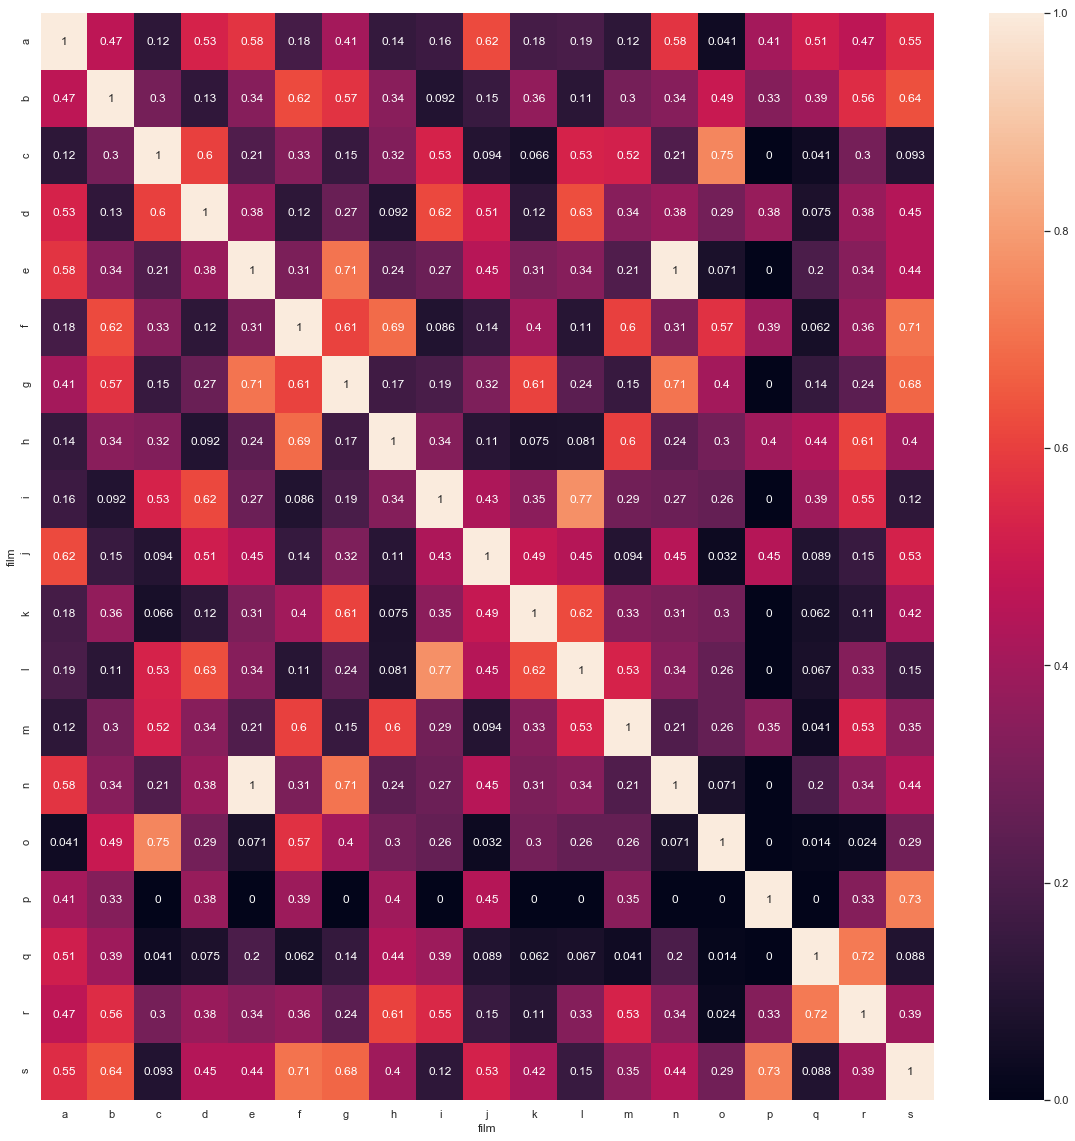

In [87]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(cor, annot=True)

## What we can learned

1. After watching film 'n', our model is very sure by watching the film 'e' the audience will love it. In fact, his beliefs up to 100% (with cosine similarity).
2. Film 'p' is the film that produces the most 0 after watching it. Some of them are films 'c', 'e', 'g', 'i', 'k', 'l'. This shows that after watching the film 'p' it is not recommended to watch a movie that has been previously mentioned.
3. If you like the movie 'L', many suggestions try to be given. Like the film 'i' (77%), film 'd' (63%) film 'k' (62%).